<a href="https://colab.research.google.com/github/kavy9/Next_word_prediction/blob/main/Next_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SD lab 
 

Kavya Suthar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data=open('/content/1661-0.txt','r')

In [ ]:
data=data.read().lower()

In [ ]:
raw_data=data

In [ ]:
data=data.split()

In [ ]:
len(data)

107603

In [ ]:
data[0]

'\ufeff'

In [ ]:
len(data)

107603

In [ ]:
raw_data.replace(',','')
raw_data.replace("'",' ')

In [ ]:
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokenizer=RegexpTokenizer(r'w+')
text=word_tokenize(raw_data)

In [ ]:
text

In [ ]:
len(text)

128556

In [ ]:
unique_words=np.unique(text)

In [ ]:
len(unique_words)

9401

In [ ]:
WORD_LENGTH=5

In [ ]:
word=[]
first_five=[]
for i in range(5,len(text)):
  word.append(text[i])
  first_five.append(text[i-5:i])

In [ ]:
dict={
    'first_five':first_five,
        'words':word 
}
df=pd.DataFrame(dict)

In [ ]:
df.head(10)

,first_five,words
0,"[﻿, project, gutenberg, 's, the]",adventures
1,"[project, gutenberg, 's, the, adventures]",of
2,"[gutenberg, 's, the, adventures, of]",sherlock
3,"['s, the, adventures, of, sherlock]",holmes
4,"[the, adventures, of, sherlock, holmes]",","
5,"[adventures, of, sherlock, holmes, ,]",by
6,"[of, sherlock, holmes, ,, by]",arthur
7,"[sherlock, holmes, ,, by, arthur]",conan
8,"[holmes, ,, by, arthur, conan]",doyle
9,"[,, by, arthur, conan, doyle]",this


In [ ]:
X=np.zeros((len(df['first_five']),WORD_LENGTH,len(unique_words)),dtype=bool)
y=np.zeros((len(df['first_five']),len(unique_words)),dtype=bool)

In [ ]:
X.shape

(128551, 5, 9401)

In [ ]:
y.shape

(128551, 9401)

In [ ]:
len(df['first_five'])

128551

In [ ]:
df.shape

(128551, 2)

In [ ]:
np.where('arthur'==unique_words)[0][0]

637

In [ ]:
for i,row in df.iterrows():
  for j,word in enumerate(row['first_five']):
    X[i,j,np.where(unique_words==word)[0]]=1
  y[i,np.where(unique_words==row['words'])[0]]=1

In [ ]:
X.shape

(128551, 5, 9401)

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [ ]:
#this is where we train the model i saved the model and reused it in next cell as it took me 1.5 hour to train it

# optimizer = RMSprop(lr=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# history = model.fit(X, y, validation_split=0.05, batch_size=256, epochs=16, shuffle=True).history

In [ ]:
import pickle

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#model.save('keras_next_word_model.h5')
#pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [ ]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

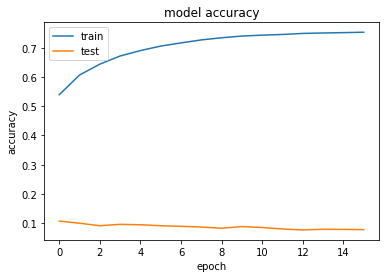

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

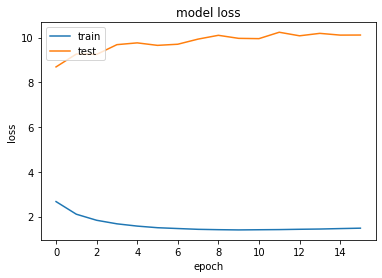

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
def prepare_input(text):
    SEQUENCE_LENGTH = len(text)
    x = np.zeros((1, SEQUENCE_LENGTH, len(unique_words)))
    for t, char in enumerate(text):
        x[0,t,np.where(unique_words==char)[0]]=1
        
    return x

In [ ]:
inp="In his eyes she eclipses"

In [ ]:
prepare_input(inp.split()).shape

(1, 5, 9401)

In [ ]:
prediction=model.predict(prepare_input(inp.split()))

In [ ]:
prediction

array([[1.8298991e-09, 1.4608927e-11, 8.0503811e-13, ..., 6.3834477e-08,
        1.1796907e-05, 8.0671038e-13]], dtype=float32)

In [ ]:
np.where(prediction ==np.amax(prediction))

(array([0]), array([504]))

In [ ]:
unique_words[504]

'and'